## **Load des données et animations** ##



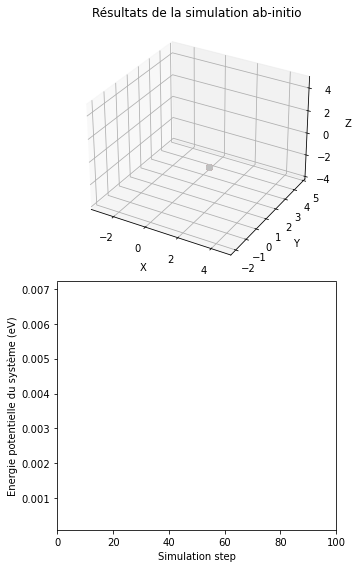

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import pandas as pd

%matplotlib inline 

#Loader du fichier .xyz
def load_data(file):
    o1_index=[2]
    o2_index=[3]
    h1_index=[4]
    h2_index=[5]
    h3_index=[6]
    h4_index=[7]
    h5_index=[8]

    o1=[]
    o2=[]
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]

    with open(file, 'r') as infile:

        for index, line in enumerate(infile):
            items = line.split()

            if index%9 in o1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o1.append([0,x,y,z])

            if index%9 in o2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o2.append([0,x,y,z])

            if index%9 in h1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h1.append([1,x,y,z])   

            if index%9 in h2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h2.append([1,x,y,z])

            if index%9 in h3_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h3.append([1,x,y,z])

            if index%9 in h4_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h4.append([1,x,y,z])

            if index%9 in h5_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h5.append([1,x,y,z])
                
    return np.concatenate((o1, o2, h1, h2, h3, h4, h5), axis=1).reshape(10000, 7, 4) #10000 fois 7 colomnes de 4 éléments  (particule, x, y, z)

#Loader de l'output de la simulation (fichier .out)
output=pd.read_csv('new_energies_sparse.out', sep=' ', header=None)

#output=pd.read_csv('zundel-1.ener', sep='       ')
#Extraction des énergies (5eme colonne)
energies=output[4]

#energies=output['     Pot.[a.u.]'][0::5]

#Load du fichier .xyz
#dataset=load_data("zundel-pos-1.xyz")
dataset=load_data("new_positions_sparse.xyz")

#################
# Plot des données (Animation 3D + Energie)
#################

#Nombre de data utilisées pour l'animation
N=100

#Init animation 2D
def init():
    return graph,

#Fonction update plot energies
def update_en(num):
    graph.set_data(x[:num],y[:num])
    return graph,

#Mise en forme des trajectoires
def transform_data(X, Y, Z):
    t = np.vstack((X, Y, Z))
    return t

#Fonction update pour le plot des trajectoires
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, num-1:num])
        line.set_3d_properties(data[2,num-1:num])
    return lines

#Fonction update des deux plots
def update_both(num, data2, line2):
    update_en(num)
    update_lines(num, data2, line2)
    
#Création de la figure
fig= plt.figure(figsize=(5, 8))

#ax1 = plot des énergies
ax1=fig.add_subplot(2, 1, 2) 
ax1.set_xlim(0, N)
ax1.set_ylim(np.min(energies), np.max(energies))
ax1.set_xlabel("Simulation step")
ax1.set_ylabel("Energie potentielle du système (eV)")

graph, = plt.plot([], [], '-')

#ax = plot des trajectoires
ax=fig.add_subplot(2, 1, 1, projection='3d')

ax.set_xlim3d([np.min(dataset[:, :, 1][:N]), np.max(dataset[:, :, 1][:N])])
ax.set_xlabel('X')

ax.set_ylim3d([np.min(dataset[:, :, 2][:N]), np.max(dataset[:, :, 2][:N])])
ax.set_ylabel('Y')

ax.set_zlim3d([np.min(dataset[:, :, 3][:N]), np.max(dataset[:, :, 3][:N])])
ax.set_zlabel('Z')

ax.set_title('Résultats de la simulation ab-initio')

plt.tight_layout()

# Données de l'énergie
x = range(N)
y = energies[:N]

# Données 3D
data=[]
lines=[]
colors=['r', 'r', 'silver','silver', 'silver', 'silver', 'silver'] #couleur des atomes
for i in range(dataset.shape[1]):
    coord=dataset[:, i][:N]
    X=coord[:, 1]
    Y=coord[:, 2]
    Z=coord[:, 3]
    data.append(transform_data(X, Y, Z))
    
    lines.append(ax.plot(data[0][0,0:1], data[0][1,0:1], data[0][2,0:1], 'o', color=colors[i])[0])

# Objet d'animation
ani = animation.FuncAnimation(fig, update_both, len(X), fargs=(data, lines),
                              interval=100, blit=False)

# ani.save('ab-initio.mp4')
plt.show()

In [110]:
import mdtraj as mdt
import nglview as nv
nv.show_mdtraj(mdt.load_xyz("new_positions_sparse.xyz", top='zundel.pdb', stride=10))

NGLWidget(max_frame=999)

In [94]:
dataset=dataset

In [95]:
output

,0,1,2,3,4,5,6,7,8
0,1.0,2.0,0.003692,0.003269,0.000096,0.003174,0.000302,95.439881,NaN
1,1.0,102.0,0.004527,0.006531,0.002632,0.003899,0.000371,117.256850,NaN
2,1.0,202.0,0.003945,0.007161,0.002978,0.004182,0.000398,125.779360,NaN
3,1.0,302.0,0.003904,0.005873,0.002675,0.003198,0.000305,96.178014,NaN
4,1.0,402.0,0.004485,0.007464,0.003446,0.004018,0.000383,120.833550,NaN
...,...,...,...,...,...,...,...,...,...
9995,1.0,999502.0,0.013434,0.006745,0.002987,0.003757,0.000358,112.999770,NaN
9996,1.0,999602.0,0.012982,0.004565,0.001085,0.003480,0.000331,104.660550,NaN
9997,1.0,999702.0,0.013049,0.006868,0.003645,0.003222,0.000307,96.906016,NaN
9998,1.0,999802.0,0.013642,0.006621,0.002572,0.004050,0.000386,121.790850,NaN


## **Mise en place des descripteurs (matrice de Coulomb)** ##

In [96]:
from ase import Atoms
from dscribe.descriptors import CoulombMatrix

#Fonction pour la création de la matrice de Coulomb à partir d'un dataset
def create_CM(data):
    cm = CoulombMatrix(n_atoms_max=7)
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

## **Séparation et exploration statistique des données**. ##

data shape : (10000, 7, 4)
target shape : (10000,)


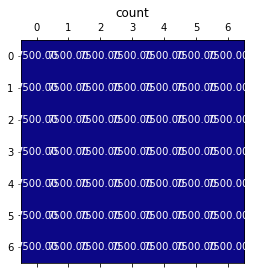

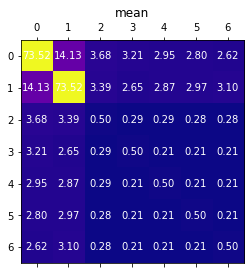

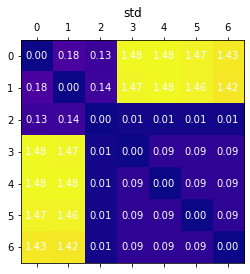

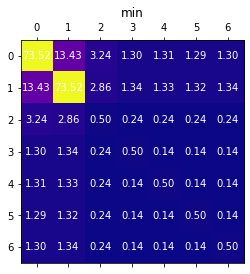

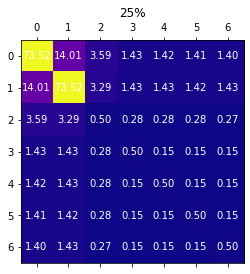

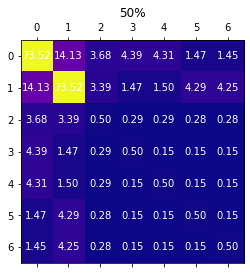

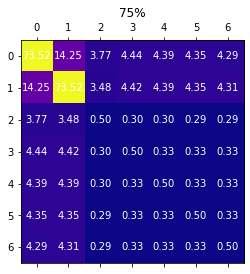

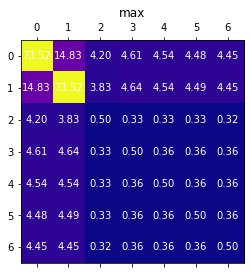

In [97]:
#Séparation des données
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

print("data shape :", dataset.shape)
print("target shape :", energies.shape)
X_train, X_test, y_train, y_test=train_test_split(dataset, energies, random_state=22)

#création des matrices de Coulomb pour les données d'entrainement
X_train_CM=create_CM(X_train)
X_test_CM=create_CM(X_test)

#conversion dans un Dataset pour explorer les données statistiquement avec les outils pandas
X_train_DF=pd.DataFrame(X_train_CM)

stat=X_train_DF.describe()

statnp=stat.to_numpy().reshape(8, 7, 7)

for i, l in enumerate(stat.index):
    #plt.subplot(2, 4, i+1)
    plt.matshow(statnp[i], cmap="plasma")
    for (x, y), value in np.ndenumerate(statnp[i]):
        plt.text(x, y, f"{value:.2f}", va="center", ha="center", color="white")
    plt.title(l)


In [98]:
dataset[-1]

array([[ 0.        ,  2.58654844, 12.89679366, 21.45336724],
       [ 0.        , -0.20412227, 13.11867535, 24.9613151 ],
       [ 1.        ,  1.21485485, 12.90784129, 23.29377728],
       [ 1.        , -0.7129864 , 14.85135666, 25.21131349],
       [ 1.        , -1.63287982, 11.99057295, 25.01914398],
       [ 1.        ,  3.9226899 , 11.70316952, 21.33694977],
       [ 1.        ,  1.88295753, 13.20836486, 19.83790884]])

Text(0.5, 1.0, 'Exemple de matrice de Coulomb')

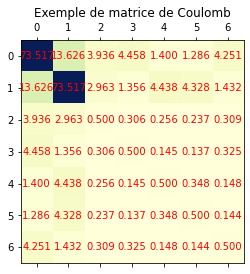

In [99]:
plt.matshow(create_CM(X_train)[0].reshape(7, 7), cmap="YlGnBu")

for (x, y), value in np.ndenumerate(create_CM(X_train)[0].reshape(7, 7)):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center", color="red")
    
plt.title("Exemple de matrice de Coulomb")

Réduction des données


In [100]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_CM_red=scaler.fit_transform(X_train_CM)
X_test_CM_red=scaler.fit_transform(X_test_CM)

#scaling des y
y_train=scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=scaler.fit_transform(y_test.to_numpy().reshape(-1, 1))

### Eigenspectrum ###

In [101]:
def create_CM_eigen(data):
    cm = CoulombMatrix(n_atoms_max=7, permutation='eigenspectrum')
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

In [102]:
pd.DataFrame(create_CM_eigen(X_train)).describe()

,0,1,2,3,4,5,6
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,88.701505,59.682468,0.417565,0.242826,0.173534,0.162842,0.152649
std,0.183102,0.177838,0.009194,0.006553,0.004729,0.004301,0.005124
min,87.977655,58.979104,0.388062,0.219960,0.157364,0.143278,0.131788
25%,88.582326,59.559842,0.411327,0.238478,0.170198,0.159958,0.149336
50%,88.705274,59.678830,0.417490,0.242890,0.173346,0.162958,0.152911
75%,88.827863,59.797708,0.423616,0.247244,0.176679,0.165817,0.156172
max,89.435804,60.383806,0.453386,0.267795,0.194823,0.178765,0.169214


In [103]:
X_train_CMe=create_CM_eigen(X_train)
X_test_CMe=create_CM_eigen(X_test)
X_train_CMe_red=scaler.fit_transform(X_train_CMe)
X_test_CMe_red=scaler.fit_transform(X_test_CMe)

## SOAP ##

In [104]:
from dscribe.descriptors import SOAP
from ase.io import read
from sklearn.decomposition import PCA

def SOAP_Vectors(xyz_filename, output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pbc=True, peratom=False, pca_d=4, njobs=4):
    """KenelPCA on atomic or per-config SOAP vectors.

    `peratom=True` performs projection on SOAP vectors from arrays
    `peratom=False` performs projection on SOAP vectors from info

    Note:
    The previous ASAP pca.py was projecting from info anyways and with peratom=True transformed the SOAP vectors from
    arrays into that space as well.

    Parameters
    ----------
    xyz_filename
    prefix
    output_filename
    cutoff
    n_max
    l_max
    zeta
    atom_sigma
    pbc
    peratom
    pca_d
    njobs

    Returns
    -------

    """

    peratom = bool(peratom)

    # read the xyz file
    frames = read(xyz_filename, ':')
    n_frames = len(frames)

    # species and PBC
    global_species = []
    for frame in frames:
        global_species.extend(frame.get_atomic_numbers())
        frame.set_pbc(pbc)
    global_species = np.unique(global_species)
    print("loaded xyz file: {fn}, with {n_frames} frames and elements: {ele}".format(fn=xyz_filename, n_frames=n_frames,
                                                                                     ele=global_species))

    # soap
    desc = SOAP(rcut=cutoff, nmax=n_max, lmax=l_max, sigma=atom_sigma, species=global_species, periodic=False,
                average="off")

    # kernel
    soap_vectors = desc.create(frames, n_jobs=njobs)
    
    data_2d = np.array([features_2d.flatten() for features_2d in soap_vectors])
    pca = PCA(n_components=pca_d)
    pca.fit(data_2d)
    Soap_pca = pca.transform(data_2d)
    print("original shape:   ", Soap_pca.shape) 
    print("transformed shape:", Soap_pca.shape)
    return Soap_pca



In [105]:
Soap_pca=SOAP_Vectors("new_positions_sparse.xyz", output_filename=None, cutoff=3., n_max=6, l_max=6, zeta=2.0,
         atom_sigma=0.5, pbc=True, peratom=False, pca_d=25, njobs=4)

loaded xyz file: new_positions_sparse.xyz, with 10000 frames and elements: [1 8]
original shape:    (10000, 25)
transformed shape: (10000, 25)


In [106]:

X_train, X_test, y_train, y_test=train_test_split(Soap_pca, energies, random_state=22)

y_train=scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=scaler.fit_transform(y_test.to_numpy().reshape(-1, 1))


## PIV Vector ##

In [12]:
from scipy.spatial import distance

def PIV_descr(X):
    piv=[]
    for i in range(len(X)):
        dist=distance.cdist(dataset[i][:, 1:], dataset[i][:, 1:], 'euclidean')
        a=np.array([dist[0, 1]])
        b=np.concatenate((dist[0, 2:],dist[1, 2:]))
        c=[]
        for i in range(2, dist.shape[0]):
            c=np.concatenate((c, dist[i, i+1:]))

        bs=-np.sort(-b)
        cs=-np.sort(-c)
        piv.append(np.concatenate((a, bs, cs)))
        
    return piv

In [13]:
X_train_PIV=PIV_descr(X_train)
X_train_PIV_red=scaler.fit_transform(X_train_PIV)
X_test_PIV=PIV_descr(X_test)
X_test_PIV_red=scaler.fit_transform(X_test_PIV)

## **Prédicteur naif** ##

In [107]:
from sklearn.metrics import mean_squared_error

def naive_predictor(xtrain, ytrain):
    return np.ones((xtrain.shape[0],))*ytrain.mean()

y_fit=naive_predictor(X_train, y_train)
y_pred_test=naive_predictor(X_test,y_train)


mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)
print(mse)
print(mse_test)

1.0
1.0


In [69]:
y_fit=naive_predictor(X_train_PIV_red, y_train)
y_pred_test=naive_predictor(X_test_PIV_red, y_train)


mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)
print(mse)
print(mse_test)

NameError: name 'X_train_PIV_red' is not defined

## **Modèle linéaire** ##

In [16]:
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_CMe_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 17.030650292528428
RMSE moyen: 0.7911226116852113
0.7564859632710091


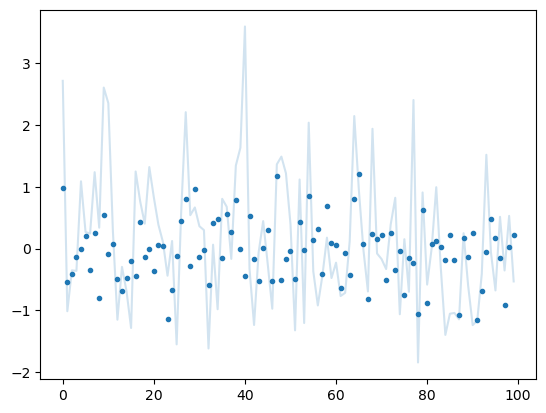

In [17]:
plt.scatter(np.arange(0, len(y_train[:100])),model.predict(X_train_CMe_red[:100]), marker='.')
plt.plot(np.arange(0, len(y_train[:100])), y_train[:100], alpha=0.2)

In [125]:
#PIV
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_PIV_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_PIV_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 4939.621743878326
RMSE moyen: 0.9993612844352441
1.0020556320981489


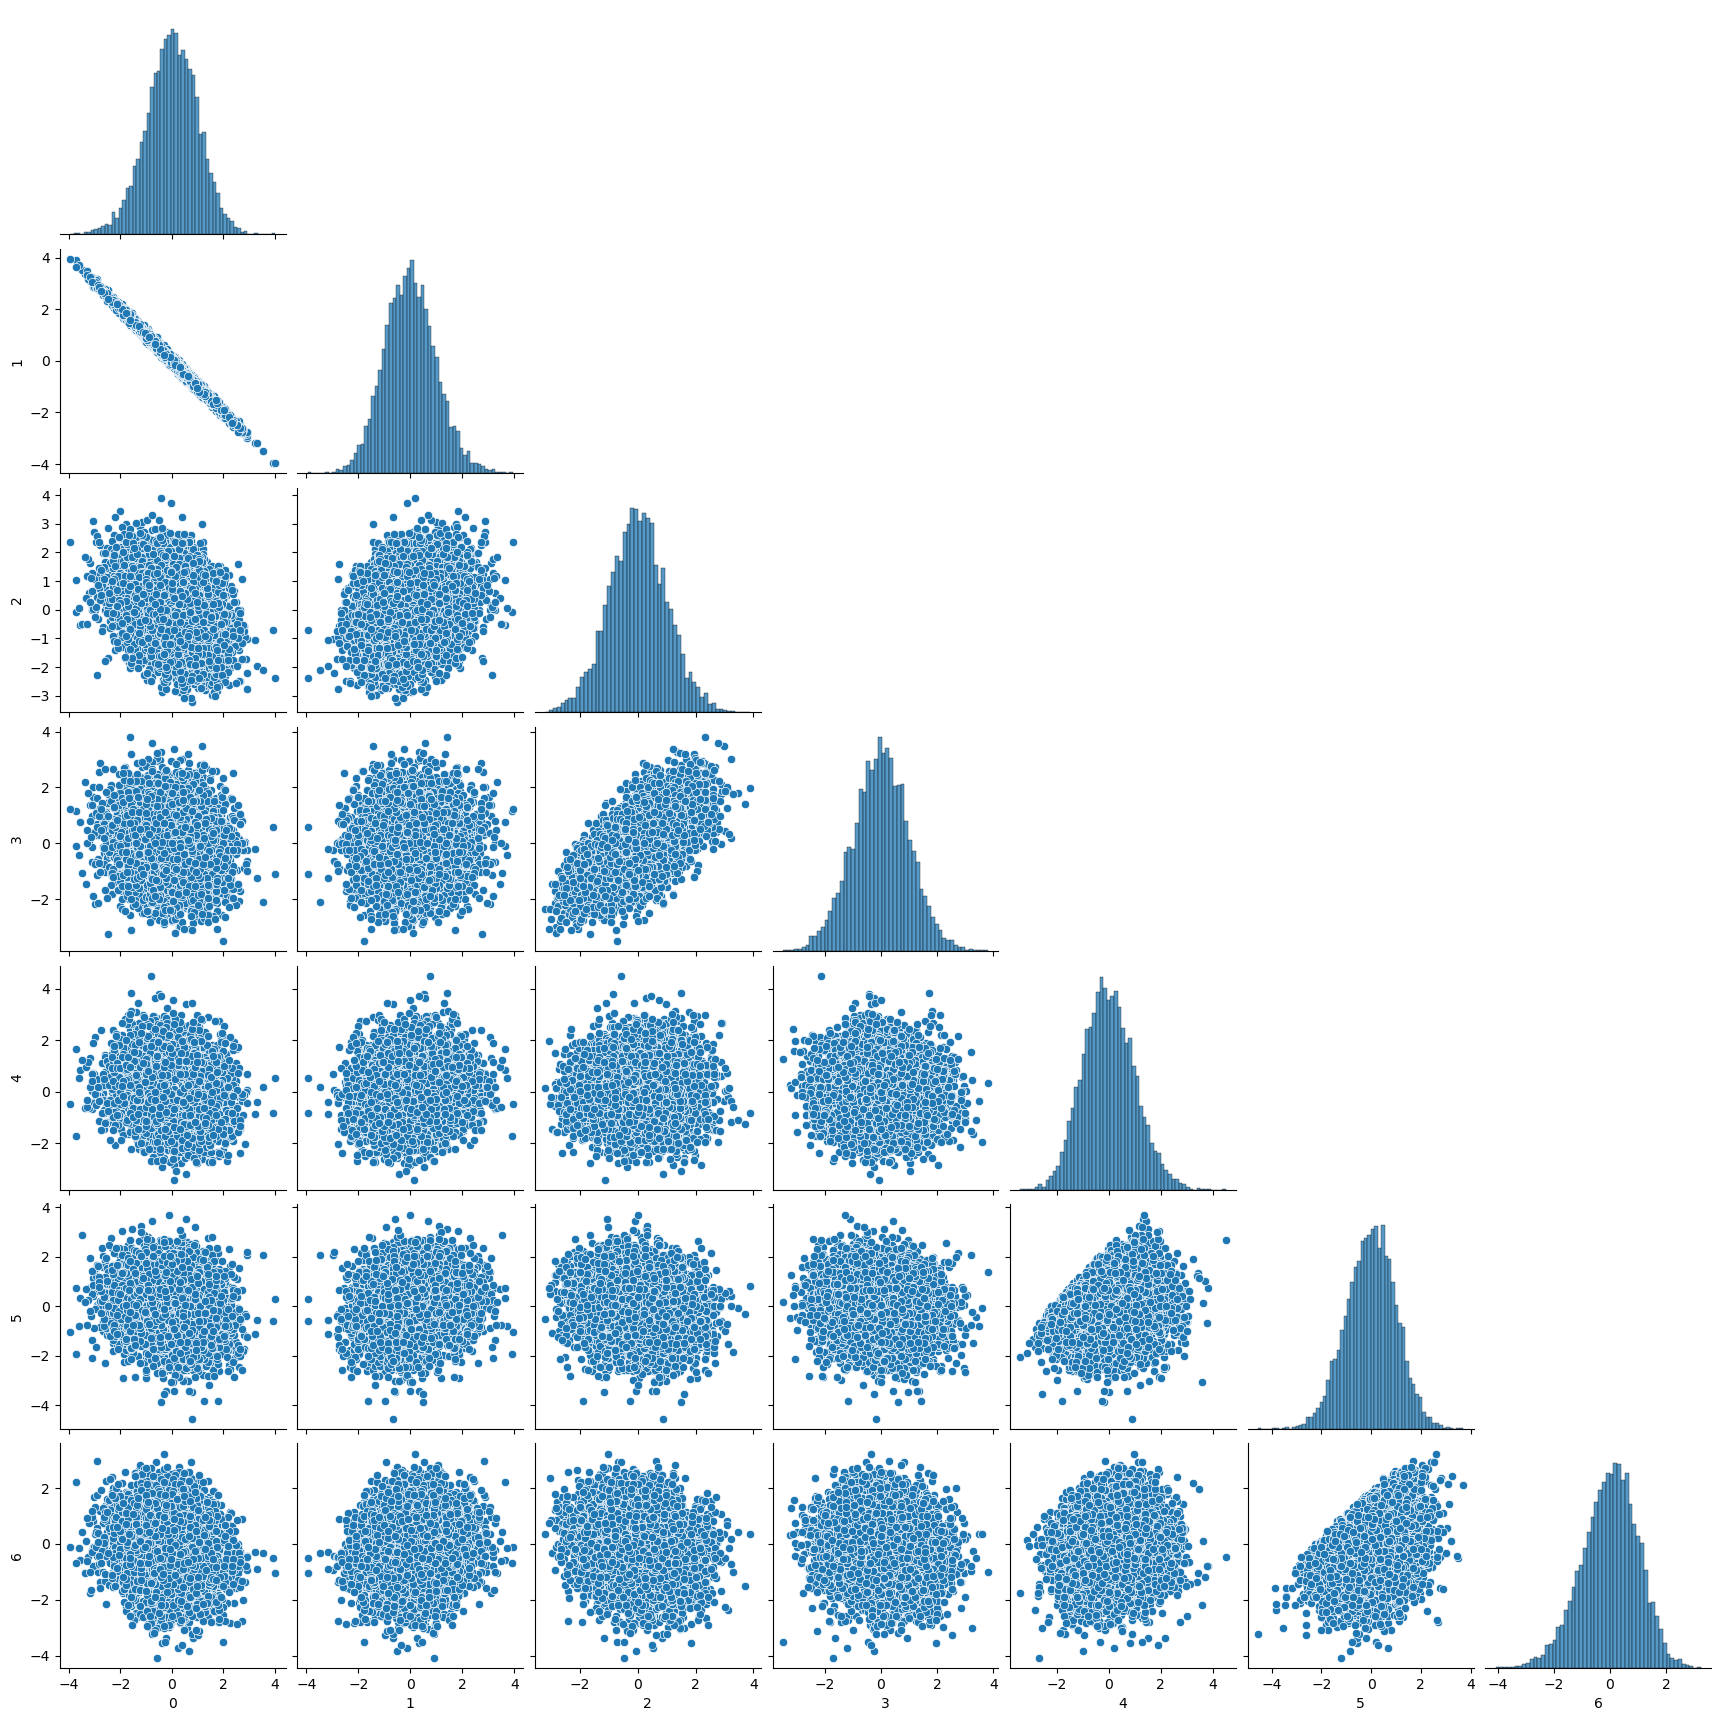

In [126]:
import seaborn as sns

sns.pairplot(pd.DataFrame(X_train_CMe_red), corner=True)

In [127]:
from sklearn.preprocessing import PolynomialFeatures

mse_list=[]
mse_test_list=[]
for d in range(1,5):
    poly=PolynomialFeatures(degree=d)
    Zmodif=poly.fit_transform(X_train_CMe_red)
    Zmodif_test=poly.fit_transform(X_test_CMe_red)

    a=np.logspace(-10, 10, 1000)
    model=RidgeCV(alphas=a)
    model.fit(Zmodif, y_train)

    print("Best regularization parameter :", model.alpha_)
    print("RMSE moyen:", -model.best_score_)

    y_pred_test_rcv=model.predict(Zmodif_test)
    mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
    print(mse_test_rcv)
    mse_list.append(-model.best_score_)
    mse_test_list.append(mse_test_rcv)

Best regularization parameter : 17.030650292528428
RMSE moyen: 0.7911226116852111
0.7564859632710308
Best regularization parameter : 14.162866162991973
RMSE moyen: 0.5399559357654162
0.5213666113617779
Best regularization parameter : 17.030650292528428
RMSE moyen: 0.5402247037401428
0.5217424378175992
Best regularization parameter : 42.818517986524064
RMSE moyen: 0.5518063896545434
0.5342317688300231


Text(0.5, 0, 'Dimension du polynome')

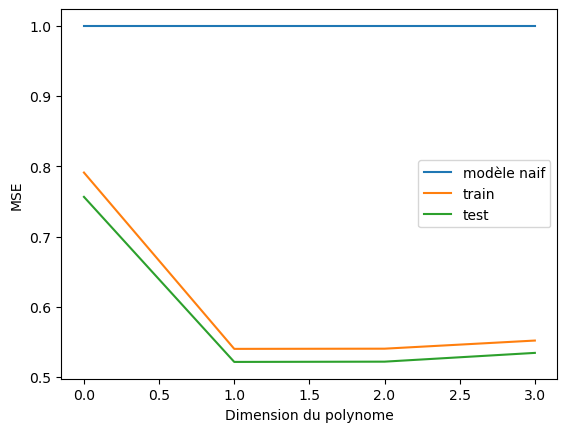

In [131]:
plt.plot([1]*len(mse_list), label='modèle naif')
plt.plot(mse_list, label="train")
plt.plot(mse_test_list, label='test')
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Dimension du polynome")

In [132]:
y_pred=model.predict(Zmodif_test)

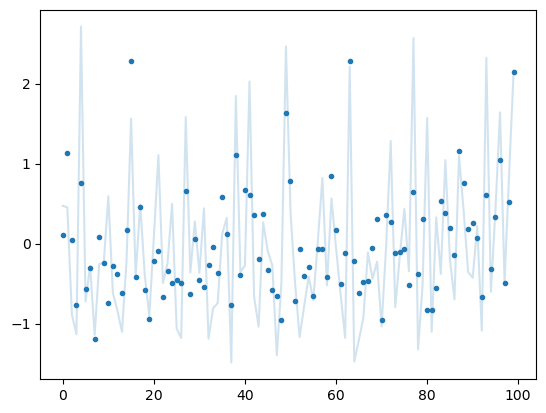

In [133]:
plt.scatter(np.arange(0, len(y_test[:100])),y_pred[:100], marker='.')
plt.plot(np.arange(0, len(y_test[:100])), y_test[:100], alpha=0.2)

In [134]:
from sklearn.linear_model import ElasticNetCV

a=np.logspace(-10, 10)
model=ElasticNetCV(alphas=a, max_iter=1000000)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
#print("RMSE moyen:", -model.best_score_)

y_pred_train_en=model.predict(X_train_CMe_red)
mse_train_en=mean_squared_error(np.array(y_train), y_pred_train_en)
print(mse_train_en)


y_pred_test_en=model.predict(X_test_CMe_red)
mse_test_en=mean_squared_error(np.array(y_test), y_pred_test_en)
print(mse_test_en)

Best regularization parameter : 0.000339322177189533
0.7893650565523528
0.7564322245105621


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
np.arange(1, 80, 30)

array([ 1, 31, 61])

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,param_grid={"alpha": np.logspace(-9, -8,2),
                                                                          "gamma": np.logspace(-1.5, -0.5,2)})
krr.fit(X_train, y_train)

y_pred_test_krr=krr.predict(X_test)

mse_test=mean_squared_error(np.array(y_test), y_pred_test_krr)
print(mse_test)

C:\Users\zways\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\kernel_ridge.py", line 167, in fit
    X, y = self._validate_data(X, y, accept_sparse=("csr", "csc"),
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accep

C:\Users\zways\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\kernel_ridge.py", line 167, in fit
    X, y = self._validate_data(X, y, accept_sparse=("csr", "csc"),
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accep

C:\Users\zways\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\kernel_ridge.py", line 167, in fit
    X, y = self._validate_data(X, y, accept_sparse=("csr", "csc"),
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accep

C:\Users\zways\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\kernel_ridge.py", line 167, in fit
    X, y = self._validate_data(X, y, accept_sparse=("csr", "csc"),
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zways\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accep

ValueError: Found array with dim 3. Estimator expected <= 2.

In [86]:
krr=KernelRidge(kernel='rbf', gamma=0.0316, alpha=1e-8)
krr.fit(X_train, y_train)

y_pred_test_krr=krr.predict(X_test)

mse_test=mean_squared_error(np.array(y_test), y_pred_test_krr)
print(mse_test)

0.0917570943852852


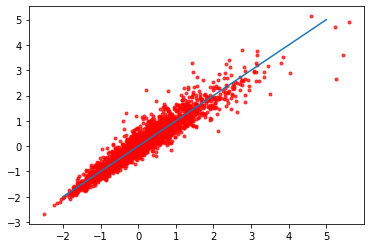

In [92]:
y_pred_test_krr=krr.predict(X_test)
plt.scatter(y_pred_test_krr,  y_test, marker='.', color='red',alpha=0.7)
plt.plot([-2, 5], [-2, 5])
plt.show()

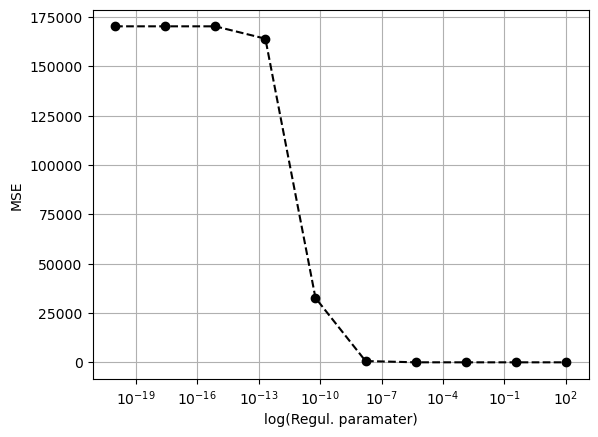

In [139]:
plt.semilogx(A, mse_test_krr, marker='o', linestyle='--', color='black')
plt.xlabel("log(Regul. paramater)")
plt.ylabel("MSE")
plt.grid(True, which="both", ls="-")
plt.show()

In [140]:
print("Best score KRR :", np.min(mse_test_krr))
idx=np.where(np.array(mse_test_krr)==np.min(mse_test_krr))
print("Best param KRR :", A[idx])

Best score KRR : 0.5443779420662072
Best param KRR : [0.35938137]


## **Réseau de neurones** ##

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                390       
                                                                 
 dense_7 (Dense)             (None, 15)                240       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 646
Trainable params: 646
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
94/94 [==============================] - 2s 10ms/step - loss: 1.1479 - mean_squared_error: 0.9924 - val_loss: 1.0010 - val_mean_squared_error: 0.8752
Epoch 2/300
94/94 [==============================] - 0s 5ms/step - loss: 1.0108 - mean_squared_error: 0.9027 - val_loss: 0.9056 - val_mean_squared_error: 0.81

Epoch 97/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2958 - mean_squared_error: 0.2713 - val_loss: 0.2810 - val_mean_squared_error: 0.2565
Epoch 98/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2921 - mean_squared_error: 0.2678 - val_loss: 0.2776 - val_mean_squared_error: 0.2538
Epoch 99/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2910 - mean_squared_error: 0.2668 - val_loss: 0.2792 - val_mean_squared_error: 0.2554
Epoch 100/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2911 - mean_squared_error: 0.2671 - val_loss: 0.2974 - val_mean_squared_error: 0.2734
Epoch 101/300
94/94 [==============================] - 0s 5ms/step - loss: 0.2956 - mean_squared_error: 0.2716 - val_loss: 0.2933 - val_mean_squared_error: 0.2699
Epoch 102/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2893 - mean_squared_error: 0.2660 - val_loss: 0.2782 - val_mean_squared_error: 0.2547
Epoch 103/300
94/94 [====

94/94 [==============================] - 0s 4ms/step - loss: 0.2818 - mean_squared_error: 0.2639 - val_loss: 0.2765 - val_mean_squared_error: 0.2584
Epoch 198/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2839 - mean_squared_error: 0.2659 - val_loss: 0.2715 - val_mean_squared_error: 0.2537
Epoch 199/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2891 - mean_squared_error: 0.2711 - val_loss: 0.2987 - val_mean_squared_error: 0.2808
Epoch 200/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2861 - mean_squared_error: 0.2681 - val_loss: 0.2776 - val_mean_squared_error: 0.2595
Epoch 201/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2826 - mean_squared_error: 0.2647 - val_loss: 0.2716 - val_mean_squared_error: 0.2537
Epoch 202/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2812 - mean_squared_error: 0.2633 - val_loss: 0.2705 - val_mean_squared_error: 0.2527
Epoch 203/300
94/94 [===============

94/94 [==============================] - 0s 4ms/step - loss: 0.2743 - mean_squared_error: 0.2588 - val_loss: 0.2868 - val_mean_squared_error: 0.2715
Epoch 298/300
94/94 [==============================] - 1s 6ms/step - loss: 0.2782 - mean_squared_error: 0.2628 - val_loss: 0.2776 - val_mean_squared_error: 0.2622
Epoch 299/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2767 - mean_squared_error: 0.2612 - val_loss: 0.2781 - val_mean_squared_error: 0.2627
Epoch 300/300
94/94 [==============================] - 0s 4ms/step - loss: 0.2732 - mean_squared_error: 0.2576 - val_loss: 0.2792 - val_mean_squared_error: 0.2638


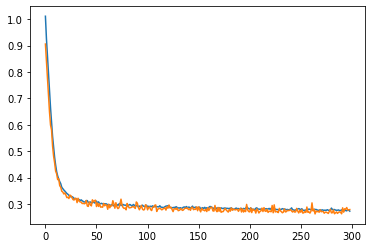

In [32]:
import keras
import tensorflow as tf
from keras import regularizers
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.8)

model=Sequential()
model.add(Dense(units=15, activation='tanh', input_shape=(25,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=15, activation='tanh'))
model.add(Dense(units=1))
model.summary()

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['mean_squared_error'])

Hist=model.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist.history['loss'][1:])
plt.plot(Hist.history['val_loss'][1:])

#model.predict(X_train_CM_red)

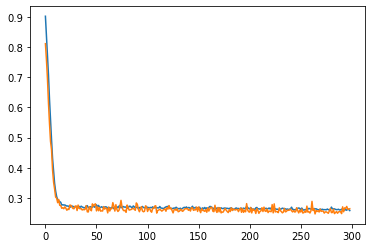

In [33]:
plt.plot(Hist.history['mean_squared_error'][1:])
plt.plot(Hist.history['val_mean_squared_error'][1:])

4/4 [==============================] - 0s 5ms/step


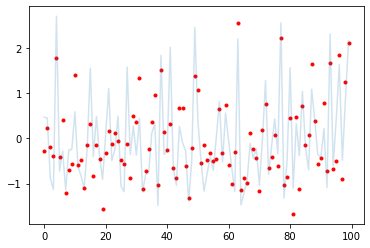

79/79 [==============================] - 0s 3ms/step


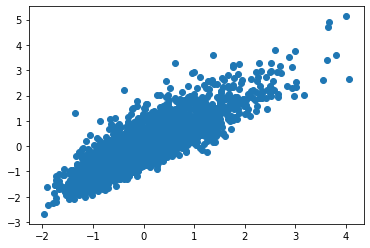

In [38]:
plt.scatter(np.arange(0, len(y_train[:100])),model.predict(X_test[:100]), marker='.', color='red')
plt.plot(np.arange(0, len(y_train[:100])), y_test[:100], alpha=0.2)

plt.show()

plt.scatter(model.predict(X_test),y_test)

79/79 [==============================] - 0s 2ms/step


2022-11-24 20:30:45.483635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


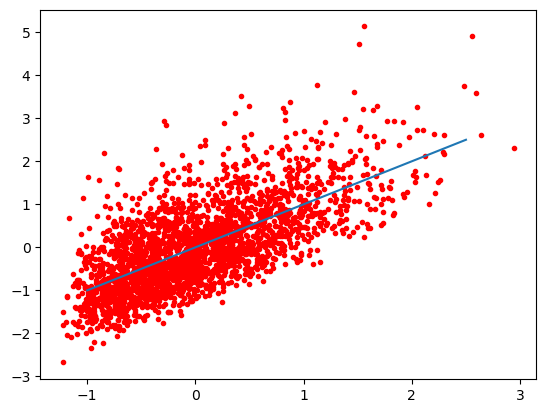

In [40]:
plt.scatter(model.predict(X_test_CMe_red),  y_test, marker='.', color='red')
plt.plot([-1, 2.5], [-1, 2.5])
plt.show()